The idea for this project is based on musical works by Bach and Beethoven and many others which seem to convey macroforms into smaller levels, like key and chords patterns. An example of this are sonatas in which the movements use a tonic dominant tonic pattern for their movement and the same scheme is used also within each movement and in the chord patterns. This is quite usual in common practice music. All of this revolves around the idea of self-similarity and scale invariance, and I think that it is very usable in structuring and generating music that makes sense to the human brain. From what I've read(Levitin, Margulis) repetition seems the most important musical character that gets recognized by the brain, and I wanted to glue together these concepts (scale invariance and repetition) to create music pieces starting from as few elements as possible and hear what are the results, in particular where they are placed in the order-chaos balance, which I think is a useful concept to evaluate a piece of computer-generated music, and according to Hanslick, Kivy and the aforementioned Levitin and Margulis is the key for the enjoyment of music. Of course, everyone has his balance so I used mine till this point.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from reaperautoops import automation_write

We start out by creating a small sequence like 1,0,1, which look like this


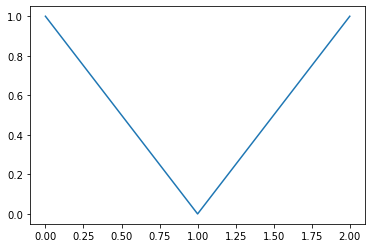

In [2]:
plt.plot(range(3), [1,0,1])
plt.show()

This is what i call a level 0 sequence. At this point i have thought 2 ways in which self similarity and scale invariance can be achieved, sum and multiplication.


Let's take a look at the first method: sum. We're going to generate a new sequence that consists in concatenate smaller sequences that are the resul of summing each memmber of the current sequence with the initial sequence. This is what I call an increment of level, and we can repeat this procedure as much as we want. Let's take a look at the sequence we had at different levels of silf-similarity.


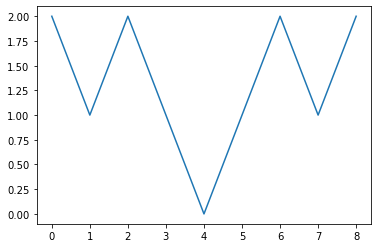

In [3]:
lvl0 = np.array([1,0,1])
lvl1 = np.add.outer(lvl0, lvl0).reshape(-1)
plt.plot(lvl1)
plt.show()
#Level 1 sum

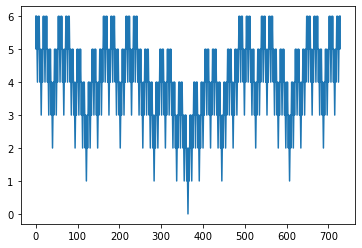

In [4]:
lvl5 = lvl0
for _ in range(5):
    lvl5 = np.add.outer(lvl5, lvl0).reshape(-1)

plt.plot(lvl5)
plt.show()
#Level 5 sum

The other method is by applying multiplication instead of sum, and the results are quite different

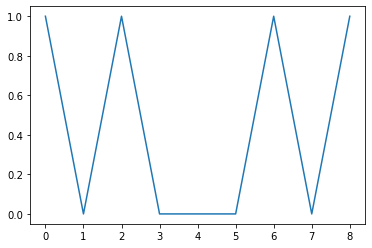

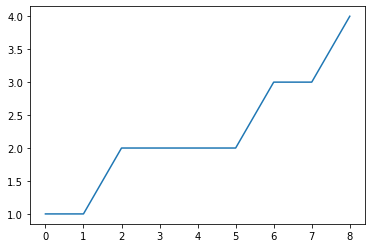

In [5]:
lvl1 = np.outer(lvl0,lvl0).reshape(-1)
plt.plot(lvl1)
plt.show()
#Level 1 multiplication

primitive = np.cumsum(lvl1)

plt.plot(primitive)
plt.show()

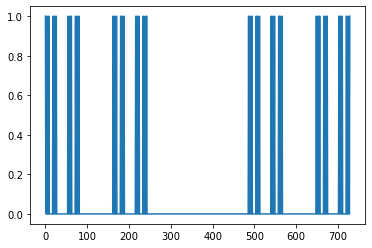

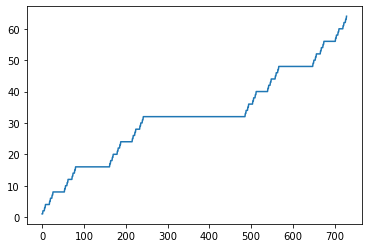

In [6]:
lvl5 = lvl0
for _ in range(5):
    lvl5 = np.outer(lvl5,lvl0).reshape(-1)

plt.plot(lvl5)
plt.show()
#Level 5 multiplication

primitive = np.cumsum(lvl5)

plt.plot(primitive)
plt.show()

Now the first application i thought about is to use these procedures to directly generate sound, and I foucesd on th multiplication method. We can easily generate random normalized(in the (-1,1) range) and make them balanced, ie the sum of all the members is 0, which is better for sound reproduction. let's see some examples, we are seeing level 5 plots, because even though is not enough for long sound generation is enough for visualize the generated data and scale invariance grants us that having more levels is not going to change much in what we see. For the sound generation we use level 10.

↓ press > to generate a sequence

[-1.          0.23341681  0.41291566  0.35366753]


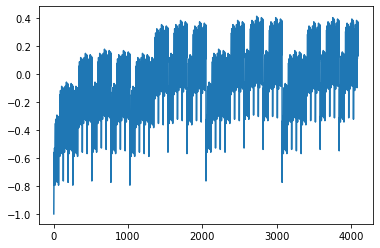

In [7]:
lvl0 = np.random.rand(3)
lvl0 = np.concatenate((lvl0, [-1*sum(lvl0)]))
np.random.shuffle(lvl0)
lvl0 = lvl0/max(abs(lvl0))
print(lvl0)

lvl5 = lvl0
for _ in range(5):
    lvl5 = np.add.outer(lvl5, lvl0).reshape(-1)

plt.plot(lvl5/max(abs(lvl5)))
plt.show()

lvl10 = lvl5
for _ in range(5):
    lvl10 = np.add.outer(lvl10, lvl0).reshape(-1)

To me this resembles a sound waveform, shall we increase the level a bit more and listen to it?


↓ press > to export the file 

In [8]:
write("soundsum.wav", 48000, lvl10/max(abs(lvl10)).astype(np.float32))

Lets try with a multiplication now

In [11]:
lvl0 = np.random.rand(3)
lvl0 = np.concatenate((lvl0, [-1*sum(lvl0)]))
np.random.shuffle(lvl0)
lvl0 = lvl0/max(abs(lvl0))
print(lvl0)

lvl10 = lvl0
for _ in range(10):
  lvl10 = np.outer(lvl10, lvl0).reshape(-1)

lvl10 = lvl10/max(abs(lvl10))
# plt.plot(lvl10)
# plt.show()

write("soundmult.wav", 48000, lvl10.astype(np.float32))

[ 0.55687863  0.19563529 -1.          0.24748608]


Let's try to create a reaper automation item now

In [15]:
automation_write("AddLvl5", len(lvl5)/2, lvl5, 1)

Here is the part about rhythm: to have rhythimc binarylike automations we use the curve as a probability. each point in the curve is the probabilty of a 1 to appear in the sequence.
We can process this way the final level curve or a low level one an increase the level via multiplication afterwards.

[0.63682502 0.1106652  1.         0.25561638]


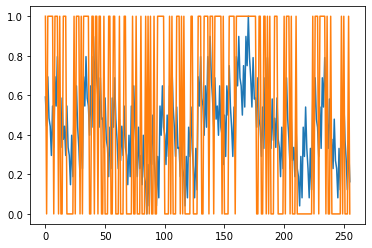

In [26]:
lvl0 = np.random.rand(4)
np.random.shuffle(lvl0)
lvl0 = lvl0/max(abs(lvl0))
print(lvl0)

lvl5 = lvl0
for _ in range(3):
  lvl5 = np.add.outer(lvl5, lvl0).reshape(-1)
lvl5 = lvl5-np.min(lvl5)
lvl5 = lvl5/max(abs(lvl5))

rhy5 = np.heaviside(lvl5-np.random.rand(len(lvl5)), 0)
plt.plot(lvl5)

plt.plot(rhy5)
plt.show()